In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_project = pd.read_csv("africa_food_prices.csv")
df_project.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [3]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [4]:
df_project.size

18178801

In [5]:
df_project.shape

(956779, 19)

In [6]:
df_project.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [7]:
df_project = df_project.drop('Unnamed: 0', axis =1)

df_project.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [8]:
# data cleaning
df_project = df_project.drop(['mp_commoditysource','currency_id'], axis = 1)

df_project.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0


In [9]:
df = df_project[["country","currency","state","month","year","price","produce","quantity"]].copy()
df["cur_name"] = df["currency"]
df

,country,currency,state,month,year,price,produce,quantity,cur_name
0,Algeria,DZD,Alger,4,2015,90.0000,Rice - Retail,KG,DZD
1,Algeria,DZD,Alger,5,2015,96.0000,Rice - Retail,KG,DZD
2,Algeria,DZD,Alger,6,2015,96.0000,Rice - Retail,KG,DZD
3,Algeria,DZD,Alger,7,2015,83.0000,Rice - Retail,KG,DZD
4,Algeria,DZD,Alger,8,2015,80.0000,Rice - Retail,KG,DZD
...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,ZWL,Midlands,6,2021,233.3333,Beans (sugar) - Retail,KG,ZWL
956775,Zimbabwe,ZWL,Midlands,6,2021,112.5000,Toothpaste - Retail,100 ML,ZWL
956776,Zimbabwe,ZWL,Midlands,6,2021,114.0000,Laundry soap - Retail,KG,ZWL
956777,Zimbabwe,ZWL,Midlands,6,2021,59.5000,Handwash soap - Retail,250 G,ZWL


In [10]:
## TO CONVERT EACH CURRENCY PRICE TO USD

df.loc[df['cur_name'] == 'RWF', 'cur_name'] = df.loc[df['cur_name'] == 'RWF']['price'] * 0.00100
df.loc[df['cur_name'] == 'BIF', 'cur_name'] = df.loc[df['cur_name'] == 'BIF']['price'] * 0.00050
df.loc[df['cur_name'] == 'GMD', 'cur_name'] = df.loc[df['cur_name'] == 'GMD']['price'] * 0.019
df.loc[df['cur_name'] == 'NGN', 'cur_name'] = df.loc[df['cur_name'] == 'NGN']['price'] * 0.0024
df.loc[df['cur_name'] == 'ZMW', 'cur_name'] = df.loc[df['cur_name'] == 'ZMW']['price'] * 0.055
df.loc[df['cur_name'] == 'MZN', 'cur_name'] = df.loc[df['cur_name'] == 'MZN']['price'] * 0.016
df.loc[df['cur_name'] == 'LYD', 'cur_name'] = df.loc[df['cur_name'] == 'LYD']['price'] * 0.22
df.loc[df['cur_name'] == 'GHS', 'cur_name'] = df.loc[df['cur_name'] == 'GHS']['price'] * 0.16
df.loc[df['cur_name'] == 'ETB', 'cur_name'] = df.loc[df['cur_name'] =='ETB']['price'] * 0.021
df.loc[df['cur_name'] == 'MWK', 'cur_name'] = df.loc[df['cur_name'] =='MWK']['price'] * 0.0012
df.loc[df['cur_name'] == 'SOS', 'cur_name'] = df.loc[df['cur_name'] =='SOS']['price'] * 0.0017
df.loc[df['cur_name'] == 'SSP', 'cur_name'] = df.loc[df['cur_name'] =='SSP']['price'] * 0.0076
df.loc[df['cur_name'] == 'LRD', 'cur_name'] = df.loc[df['cur_name'] =='LRD']['price'] * 0.0070
df.loc[df['cur_name'] == 'GNF', 'cur_name'] = df.loc[df['cur_name'] =='GNF']['price'] * 0.00011
df.loc[df['cur_name'] == 'SLL', 'cur_name'] = df.loc[df['cur_name'] == 'SLL']['price'] * 0.000091
df.loc[df['cur_name'] == 'MRO', 'cur_name'] = df.loc[df['cur_name'] == 'MRO']['price'] * 0.028
df.loc[df['cur_name'] == 'SDG', 'cur_name'] = df.loc[df['cur_name'] == 'SDG']['price'] * 0.74
df.loc[df['cur_name'] == 'LSL', 'cur_name'] = df.loc[df['cur_name'] == 'LSL']['price'] * 0.064
df.loc[df['cur_name'] == 'NAD', 'cur_name'] = df.loc[df['cur_name'] == 'NAD']['price'] * 0.063
df.loc[df['cur_name'] == 'KES', 'cur_name'] = df.loc[df['cur_name'] == 'KES']['price'] * 0.0089
df.loc[df['cur_name'] == 'UGX', 'cur_name'] = df.loc[df['cur_name'] == 'UGX']['price'] * 0.00028
df.loc[df['cur_name'] == 'ZWL', 'cur_name'] = df.loc[df['cur_name'] == 'ZWL']['price'] * 0.0027
df.loc[df['cur_name'] == 'SZL', 'cur_name'] = df.loc[df['cur_name'] == 'SZL']['price'] * 0.064
df.loc[df['cur_name'] == 'EGP', 'cur_name'] = df.loc[df['cur_name'] == 'EGP']['price'] * 0.064
df.loc[df['cur_name'] == 'CVE', 'cur_name'] = df.loc[df['cur_name'] == 'CVE']['price'] * 0.0103
df.loc[df['cur_name'] == 'DZD', 'cur_name'] = df.loc[df['cur_name'] == 'DZD']['price'] * 0.0072
df.loc[df['cur_name'] == 'AOA', 'cur_name'] = df.loc[df['cur_name'] == 'AOA']['price'] * 0.0017
df.loc[df['cur_name'] == 'ZAR', 'cur_name'] = df.loc[df['cur_name'] == 'ZAR']['price'] * 0.063
df.loc[df['cur_name'] == 'ERN', 'cur_name'] = df.loc[df['cur_name'] == 'ERN']['price'] * 0.066
df

,country,currency,state,month,year,price,produce,quantity,cur_name
0,Algeria,DZD,Alger,4,2015,90.0000,Rice - Retail,KG,0.648
1,Algeria,DZD,Alger,5,2015,96.0000,Rice - Retail,KG,0.6912
2,Algeria,DZD,Alger,6,2015,96.0000,Rice - Retail,KG,0.6912
3,Algeria,DZD,Alger,7,2015,83.0000,Rice - Retail,KG,0.5976
4,Algeria,DZD,Alger,8,2015,80.0000,Rice - Retail,KG,0.576
...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,ZWL,Midlands,6,2021,233.3333,Beans (sugar) - Retail,KG,0.63
956775,Zimbabwe,ZWL,Midlands,6,2021,112.5000,Toothpaste - Retail,100 ML,0.30375
956776,Zimbabwe,ZWL,Midlands,6,2021,114.0000,Laundry soap - Retail,KG,0.3078
956777,Zimbabwe,ZWL,Midlands,6,2021,59.5000,Handwash soap - Retail,250 G,0.16065


In [11]:
# top 10 countries with the most record
top_10 = df_project.groupby(['country']).country_id.count().sort_values(ascending=False)[:10]
top_10

country
Rwanda        137746
Mali           73843
Burundi        60921
Gambia         56971
Niger          54974
Nigeria        50285
Zambia         42793
Mozambique     42278
Libya          41207
Benin          39530
Name: country_id, dtype: int64

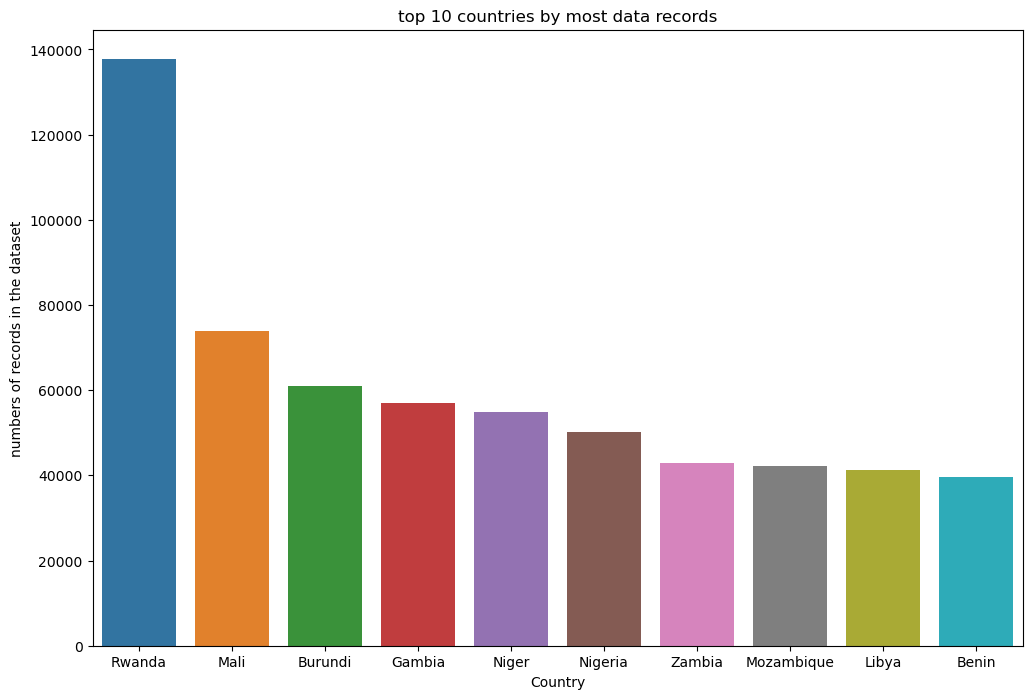

In [12]:
# THIS ARE THE BARPLOT OF THE TOP 10 COUNTRIES
plt.figure(figsize =(12,8))
sns.barplot(x = top_10.index,y=top_10.values)
plt.xlabel('Country')
plt.ylabel('numbers of records in the dataset')
plt.title('top 10 countries by most data records');

In [13]:
# top 20 most reported commodities
com_20 = df_project.groupby(['produce']).produce_id.count().sort_values(ascending =False)[:20]
com_20

produce
Millet - Retail                  47476
Rice (imported) - Retail         47022
Sorghum - Retail                 44679
Maize - Retail                   43073
Maize (white) - Retail           33786
Rice (local) - Retail            31126
Groundnuts (shelled) - Retail    23221
Beans (dry) - Retail             16173
Beans (niebe) - Retail           15760
Rice - Retail                    15513
Oil (vegetable) - Retail         14799
Wheat flour - Retail             13935
Oil (palm) - Retail              13749
Tomatoes - Retail                11562
Cassava flour - Retail           11506
Sugar - Retail                   11490
Maize flour - Retail             11407
Sweet potatoes - Retail          11208
Bananas - Retail                 10775
Beans - Retail                   10623
Name: produce_id, dtype: int64

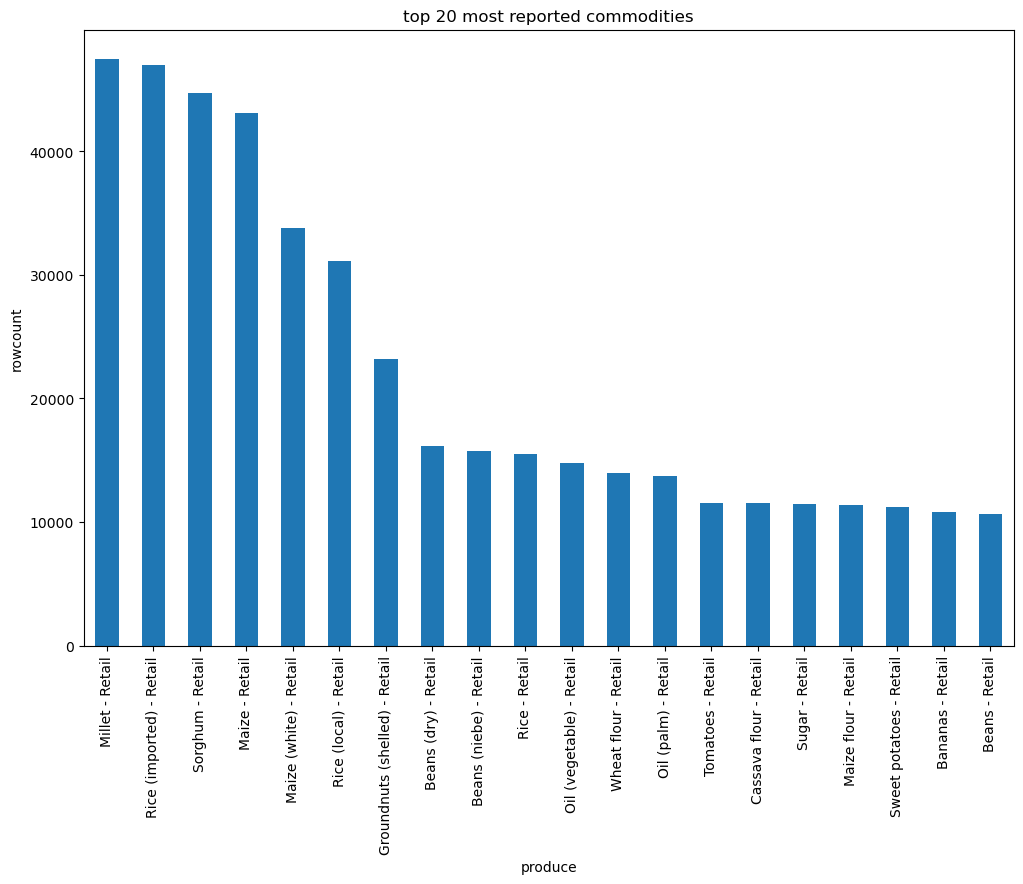

In [14]:
ax = com_20.plot(kind='bar', y= 'com_20.index',
                legend= False,figsize=(12,8), fontsize=10)
ax.set_title('top 20 most reported commodities')
ax.set_xlabel("produce", fontsize=10)
ax.set_ylabel("rowcount", fontsize=10);

In [15]:
# unique state count for each country
dups = df_project.drop_duplicates(['country','state'], keep = 'last')
state_count = dups.groupby(['country']).count()
d = state_count.sort_values('country_id',ascending = False)
d['country_id'].head()

country
Madagascar                  20
Somalia                     18
Uganda                      18
Burundi                     17
Central African Republic    16
Name: country_id, dtype: int64

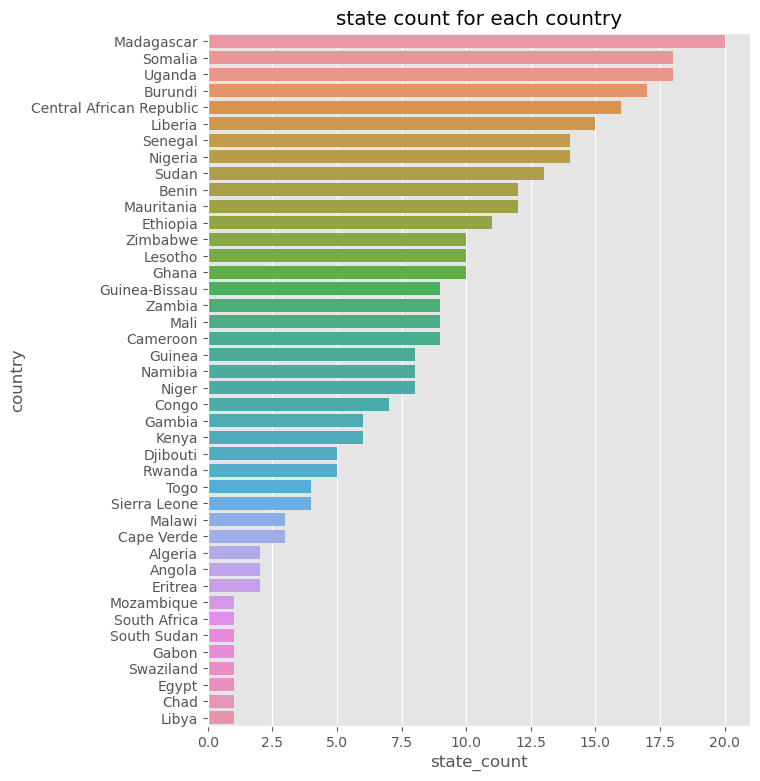

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(7,9))
g = sns.barplot(x=d.country_id,y=d.index,data=d,)
plt.title('state count for each country')
plt.xlabel('state_count')
plt.ylabel('country')
plt.show()

In [17]:
dupss = df_project.drop_duplicates(['country','produce'], keep = 'last') # dropping duplicate values
produce_count = dupss.groupby(['country']).count()
p = produce_count.sort_values('produce_id', ascending = False)[:10]
p['produce_id']

country
Ethiopia         107
Gambia            77
Rwanda            67
Cameroon          61
Nigeria           58
Benin             55
South Sudan       53
Guinea-Bissau     53
Mali              48
Ghana             47
Name: produce_id, dtype: int64

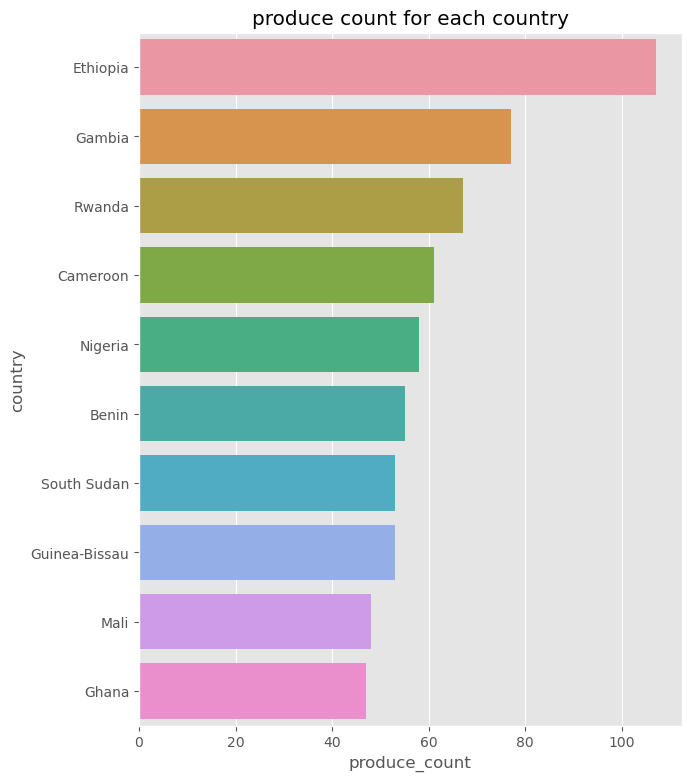

In [18]:
# the different kind of product a country produced from 1990 - 2021
plt.style.use('ggplot')
plt.figure(figsize=(7,9))
g = sns.barplot(x=p.produce_id,y=p.index,data=p)
plt.title('produce count for each country')
plt.xlabel('produce_count')
plt.ylabel('country')
plt.show()

# Ethiopia has the highest numbers of different product produced over the years from 1990 - 2021

In [19]:
df1 = df_project.drop_duplicates(['year','produce'],keep = 'last') # dropping duplicate values
produce_count = df1.groupby(['year']).count()
a = produce_count.sort_values('produce_id', ascending =False)
a['produce_id'].head()

year
2020    396
2021    358
2019    264
2018    250
2015    248
Name: produce_id, dtype: int64

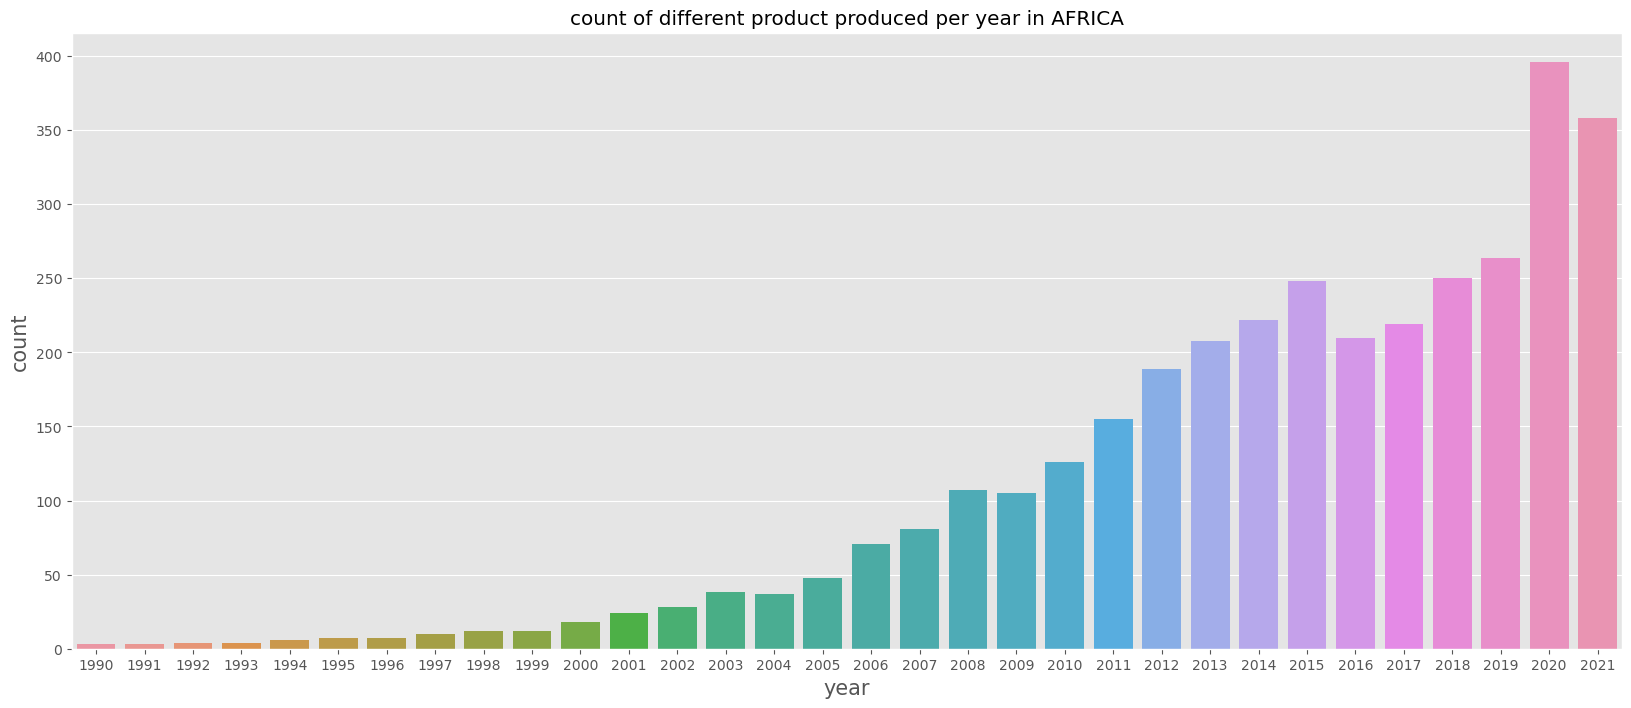

In [20]:
# visualize the amount of different kind of product produced per year in africa
plt.figure(figsize=(20,8))
sns.barplot(x = a.index, y= a.produce_id,data = a)
plt.xlabel('year',fontsize = 15)
plt.ylabel('count',fontsize = 15)
plt.title('count of different product produced per year in AFRICA');

In [21]:
# df1 will be our data frameto create chart for each country with the 
df1 = df[["produce","currency","price","year"]]

In [ ]:
# country_prices = df.groupby('country')['car_name'].mean().reset_index()
# print("Average food prices by country:")
# print(country_prices)
# convert 'cur_name' column to numeric type
df['cur_name'] = pd.to_numeric(df['cur_name'], errors='coerce')

# Drop rows with nan